In [1]:
import tensorflow as tf
import numpy as np

XOR 데이터 예시

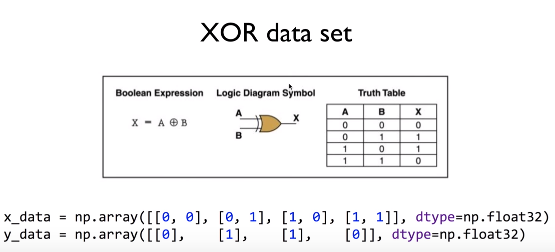

In [2]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [3]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [5]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [7]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.697136 [[ 0.06882989]
 [ 0.32948974]]
100 0.694283 [[ 0.04252048]
 [ 0.18184912]]
200 0.693613 [[ 0.03813837]
 [ 0.11258363]]
300 0.693345 [[ 0.03098198]
 [ 0.07075406]]
400 0.693233 [[ 0.02371296]
 [ 0.04496017]]
500 0.693185 [[ 0.01750143]
 [ 0.02885205]]
600 0.693164 [[ 0.01261187]
 [ 0.01867552]]
700 0.693155 [[ 0.00893936]
 [ 0.01217865]]
800 0.693151 [[ 0.00626172]
 [ 0.00799222]]
900 0.693149 [[ 0.00434822]
 [ 0.00527268]]
1000 0.693148 [[ 0.00299994]
 [ 0.00349382]]
1100 0.693148 [[ 0.00205961]
 [ 0.00232347]]
1200 0.693147 [[ 0.00140874]
 [ 0.00154969]]
1300 0.693147 [[ 0.00096078]
 [ 0.00103607]]
1400 0.693147 [[ 0.00065378]
 [ 0.000694  ]]
1500 0.693147 [[ 0.00044418]
 [ 0.00046564]]
1600 0.693147 [[ 0.0003013 ]
 [ 0.00031276]]
1700 0.693147 [[ 0.00020416]
 [ 0.00021029]]
1800 0.693147 [[ 0.00013822]
 [ 0.00014149]]
1900 0.693147 [[  9.35200369e-05]
 [  9.52658957e-05]]
2000 0.693147 [[  6.32363808e-05]
 [  6.41641964e-05]]
2100 0.693147 [[  4.27442974e-05]
 [  4.3238491

위의 방법(Logistic regression)은 XOR문제에서 좋지 않은 결과를 냄

### Neural Net을 이용한 XOR 문제 해결 방법

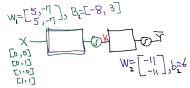

위와 같은 Neural Net 구조(두 개의 layer 이용)로 변형해 본다

In [10]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [11]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [12]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.752274 [array([[-0.04120526,  0.74336952],
       [ 1.15100145,  1.20906019]], dtype=float32), array([[-0.29247233],
       [-1.5084306 ]], dtype=float32)]
100 0.702552 [array([[-0.04860717,  0.54514956],
       [ 1.13677013,  1.04455698]], dtype=float32), array([[-0.12042342],
       [-1.2197299 ]], dtype=float32)]
200 0.699404 [array([[-0.0477509 ,  0.42638916],
       [ 1.13316453,  0.94575721]], dtype=float32), array([[-0.10228631],
       [-1.17716849]], dtype=float32)]
300 0.697436 [array([[-0.04681424,  0.33484927],
       [ 1.13038909,  0.86604369]], dtype=float32), array([[-0.08349528],
       [-1.14964128]], dtype=float32)]
400 0.696191 [array([[-0.04595844,  0.26470616],
       [ 1.1283524 ,  0.80083537]], dtype=float32), array([[-0.0635218 ],
       [-1.13015175]], dtype=float32)]
500 0.695383 [array([[-0.04527084,  0.21111092],
       [ 1.12698746,  0.74669337]], dtype=float32), array([[-0.0432011 ],
       [-1.11576474]], dtype=float32)]
600 0.69484 [array([[-0.044810

5200 0.688568 [array([[-0.74049538,  0.00431744],
       [ 1.1173147 ,  0.35801354]], dtype=float32), array([[ 0.639395  ],
       [-1.09644234]], dtype=float32)]
5300 0.687295 [array([[-0.81978613, -0.00586024],
       [ 1.13457584,  0.36798322]], dtype=float32), array([[ 0.70303899],
       [-1.10286248]], dtype=float32)]
5400 0.68564 [array([[-0.90870857, -0.01838377],
       [ 1.16009331,  0.37992272]], dtype=float32), array([[ 0.77678424],
       [-1.11036634]], dtype=float32)]
5500 0.683484 [array([[-1.00818396, -0.03374171],
       [ 1.19616294,  0.39429545]], dtype=float32), array([[ 0.86193347],
       [-1.11926615]], dtype=float32)]
5600 0.680673 [array([[-1.11917448, -0.05251957],
       [ 1.2452786 ,  0.41172701]], dtype=float32), array([[ 0.95987701],
       [-1.1300081 ]], dtype=float32)]
5700 0.677007 [array([[-1.24267936, -0.07542989],
       [ 1.3099649 ,  0.43305802]], dtype=float32), array([[ 1.07208121],
       [-1.14322114]], dtype=float32)]
5800 0.672236 [array([[

이전보다 좋은 결과가 나옴을 확인할 수 있다

## Wide NN for XOR

In [13]:
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [14]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [15]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.88556 [array([[ 0.99124795, -1.64469719,  0.7268663 ,  1.80747795,  1.15080094,
        -0.41955623, -1.92722762,  0.4717094 ,  1.09953558,  1.63101673],
       [ 0.55370808, -0.16585834, -0.14654092, -0.93291795,  1.56914735,
         0.77606773,  0.76596242, -0.61443645,  1.55532074, -0.58875698]], dtype=float32), array([[ 1.90271997],
       [ 0.38629127],
       [ 1.75004458],
       [ 0.09500173],
       [-0.97518605],
       [ 0.71361768],
       [ 2.12950683],
       [ 0.23797964],
       [ 0.61683768],
       [ 1.41958642]], dtype=float32)]
100 0.628818 [array([[ 1.01723361, -1.6460278 ,  0.58902997,  1.80578744,  1.0445497 ,
        -0.51022941, -2.07458568,  0.461155  ,  1.11450779,  1.5670253 ],
       [ 0.66495597, -0.13682808, -0.2062545 , -0.93446761,  1.50077617,
         0.75068361,  1.12888598, -0.62665719,  1.56398976, -0.87663358]], dtype=float32), array([[ 1.66330051],
       [ 0.3576124 ],
       [ 1.50150347],
       [ 0.01158222],
       [-1.15702748],
      

1600 0.107439 [array([[ 2.3797667 , -1.64845049,  0.53515702,  1.85071886, -0.36607271,
        -0.96088541, -4.7865653 ,  0.46744984,  1.20247805,  3.58432364],
       [ 2.17959452,  0.05936642, -1.11915016, -1.78748763,  1.47067845,
         0.77663946,  4.17802858, -0.63853556,  1.60334933, -3.97759938]], dtype=float32), array([[ 2.18590403],
       [ 0.25542152],
       [ 1.28926826],
       [ 1.2282728 ],
       [-1.93291068],
       [ 0.55723178],
       [ 6.14454031],
       [-0.15649828],
       [-0.1014875 ],
       [ 4.80336666]], dtype=float32)]
1700 0.0975959 [array([[ 2.41841173, -1.64894116,  0.54330558,  1.8651017 , -0.40857863,
        -0.97503853, -4.87120867,  0.46959168,  1.20141709,  3.65594649],
       [ 2.22906637,  0.06435652, -1.14472163, -1.83147228,  1.49442554,
         0.78270823,  4.25958157, -0.63558066,  1.60267079, -4.06880522]], dtype=float32), array([[ 2.21944237],
       [ 0.25678715],
       [ 1.28912818],
       [ 1.2747525 ],
       [-1.98149288],


3200 0.0372257 [array([[ 2.76669407, -1.65514314,  0.62698835,  2.04878497, -0.80050647,
        -1.12518048, -5.62201691,  0.51288319,  1.18336797,  4.27030277],
       [ 2.68635654,  0.11324713, -1.37471914, -2.25740123,  1.80445075,
         0.85502583,  4.95720339, -0.59346598,  1.58978558, -4.8452282 ]], dtype=float32), array([[ 2.55081773],
       [ 0.28804109],
       [ 1.30651867],
       [ 1.72836828],
       [-2.47134829],
       [ 0.68958449],
       [ 8.00984955],
       [-0.35507905],
       [-0.35660136],
       [ 6.22992229]], dtype=float32)]
3300 0.0356063 [array([[ 2.78138947, -1.65548885,  0.6309213 ,  2.05860472, -0.81798851,
        -1.13265574, -5.65311337,  0.51601839,  1.18229449,  4.29484653],
       [ 2.70601511,  0.11554176, -1.3844732 , -2.27657032,  1.82137918,
         0.85896057,  4.98521757, -0.59099257,  1.58895683, -4.87616205]], dtype=float32), array([[ 2.56586814],
       [ 0.29015997],
       [ 1.30804455],
       [ 1.74905527],
       [-2.49427557],

4800 0.0210803 [array([[ 2.94716763, -1.66005278,  0.67768079,  2.18017101, -1.02530468,
        -1.22566891, -6.00033426,  0.56213999,  1.16862118,  4.56379652],
       [ 2.92939425,  0.14344385, -1.49522018, -2.50002384,  2.03350329,
         0.91037178,  5.2943387 , -0.55867332,  1.57786059, -5.21526527]], dtype=float32), array([[ 2.74161768],
       [ 0.31900895],
       [ 1.32972765],
       [ 1.9924742 ],
       [-2.76786017],
       [ 0.79266894],
       [ 8.97485828],
       [-0.47364074],
       [-0.48910242],
       [ 6.90767336]], dtype=float32)]
4900 0.0204986 [array([[ 2.95565367, -1.66032505,  0.68019736,  2.18690944, -1.03649211,
        -1.23091042, -6.01793051,  0.56510478,  1.16784799,  4.57717943],
       [ 2.94090343,  0.14498754, -1.50093114, -2.51182723,  2.04539084,
         0.91340071,  5.30984402, -0.55679733,  1.57720447, -5.23214722]], dtype=float32), array([[ 2.7509191 ],
       [ 0.32074067],
       [ 1.33106077],
       [ 2.00545597],
       [-2.78265095],

6400 0.0143665 [array([[ 3.06047344, -1.66399121,  0.71234071,  2.27406955, -1.18001473,
        -1.30018699, -6.23381805,  0.60751718,  1.15774024,  4.73949146],
       [ 3.08359766,  0.16518933, -1.57187366, -2.66059136,  2.20022702,
         0.95469034,  5.49901628, -0.53190577,  1.56833029, -5.43694687]], dtype=float32), array([[ 2.86842275],
       [ 0.34431618],
       [ 1.34933257],
       [ 2.17025733],
       [-2.97218633],
       [ 0.87507999],
       [ 9.61329651],
       [-0.56028879],
       [-0.57585633],
       [ 7.33512163]], dtype=float32)]
6500 0.0140783 [array([[ 3.06628895, -1.66421771,  0.71418363,  2.27911258, -1.18827879,
        -1.30429339, -6.24571514,  0.61020672,  1.15715075,  4.74833822],
       [ 3.09154058,  0.16637686, -1.57583249, -2.66900539,  2.20924306,
         0.95720881,  5.5093894 , -0.53043634,  1.56779385, -5.4481101 ]], dtype=float32), array([[ 2.87508893],
       [ 0.34574595],
       [ 1.35044384],
       [ 2.17964745],
       [-2.98308468],

8000 0.0107687 [array([[ 3.14163136, -1.66732645,  0.73866582,  2.34635091, -1.29834807,
        -1.36027479, -6.39904404,  0.64859051,  1.14925373,  4.86149311],
       [ 3.19466901,  0.18248214, -1.62735975, -2.77951074,  2.32996464,
         0.99228406,  5.64266396, -0.51067352,  1.56046462, -5.59084082]], dtype=float32), array([[  2.96293712],
       [  0.36548173],
       [  1.36577833],
       [  2.30373359],
       [ -3.12808704],
       [  0.94408047],
       [ 10.08656406],
       [ -0.6296351 ],
       [ -0.63936198],
       [  7.64184093]], dtype=float32)]
8100 0.0105995 [array([[ 3.14599705, -1.66751719,  0.74012011,  2.35035372, -1.30489898,
        -1.36368454, -6.40788221,  0.65102446,  1.14878094,  4.86796999],
       [ 3.20065594,  0.18345866, -1.63035917, -2.78599834,  2.33717823,
         0.9944635 ,  5.65032482, -0.50949198,  1.56001377, -5.59900475]], dtype=float32), array([[  2.96811485],
       [  0.36669573],
       [  1.36672008],
       [  2.31106424],
       

9600 0.00855111 [array([[ 3.20424271, -1.67024565,  0.75991899,  2.40483618, -1.39412391,
        -1.41104746, -6.52526283,  0.68583393,  1.14234543,  4.95353174],
       [ 3.28062034,  0.19698113, -1.67052627, -2.87339926,  2.4356246 ,
         1.02521122,  5.75187063, -0.49344444,  1.55377734, -5.70679522]], dtype=float32), array([[  3.03813696],
       [  0.38365135],
       [  1.37985802],
       [  2.4103632 ],
       [ -3.25412321],
       [  1.00371909],
       [ 10.46078777],
       [ -0.68793595],
       [ -0.68896443],
       [  7.87864542]], dtype=float32)]
9700 0.00844078 [array([[ 3.20771122, -1.67041254,  0.76112193,  2.40814137, -1.399544  ,
        -1.41398144, -6.53221989,  0.68804699,  1.14195204,  4.95857525],
       [ 3.28538656,  0.19781651, -1.67292631, -2.87865162,  2.44161224,
         1.02714431,  5.75787878, -0.49247608,  1.55339432, -5.71314812]], dtype=float32), array([[  3.04236341],
       [  0.38470623],
       [  1.38067365],
       [  2.41636515],
     

Hypothesis를 이전과 비교하면 레이블 값과 더 가까워짐을 확인할 수 있다

## 2Layers

### Narrow

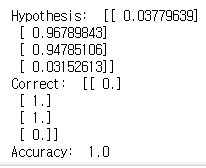

### Wide (모델이 더 학습이 잘되었음)

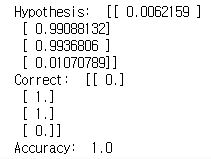

## Deep NN for XOR

In [16]:
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

In [17]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [18]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2, W3, W4]))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 1.61511 [array([[-0.00721188,  0.59746385,  1.13646328,  0.03453634,  0.74675488,
        -2.16458988, -2.33251905,  0.01336051, -0.78207242, -0.58006668],
       [ 0.4031544 , -0.25846049,  2.02583218, -0.73205477, -1.12331045,
        -0.26838243,  0.23887569, -0.9471963 ,  1.33665991, -0.89185822]], dtype=float32), array([[ 0.09847505, -0.45892808,  0.72711718, -0.09809299,  1.39951277,
         0.04326089, -1.22462308,  1.40213466, -2.07225013,  1.16925931],
       [ 0.33122894,  1.38584971, -0.45685345,  0.16521041,  1.73343182,
        -0.67443168, -0.61110711, -1.06853712, -0.89704484, -0.51734084],
       [ 2.03685689,  0.17154755,  0.94252551,  0.97736371, -0.75176114,
         1.54533148,  0.04796773, -0.13357265,  2.66046309, -0.63821375],
       [-2.05157351,  0.37234744,  0.39256972, -0.13766837,  0.33526427,
         0.03787644, -1.6962148 , -0.26039165, -0.22086349,  0.26195034],
       [-0.89113599, -1.55480123,  0.17037754, -2.64076877,  1.33724451,
         0.466899

400 0.616563 [array([[-0.03362128,  0.62905294,  1.52628732,  0.15846455,  1.15010309,
        -2.0616014 , -2.44493961,  0.05290857, -0.97424585, -0.92261261],
       [ 0.33230865, -0.3372266 ,  2.29397249, -0.73813021, -0.95405328,
         0.00299655,  0.07187045, -1.11425471,  1.17600346, -1.2312454 ]], dtype=float32), array([[ 0.04709307, -0.46960676,  0.71898842, -0.09085713,  1.38516212,
         0.03427063, -1.24961877,  1.43981218, -1.97873747,  1.16990042],
       [ 0.22128575,  1.37568808, -0.45752612,  0.09166894,  1.72071075,
        -0.6140241 , -0.67884821, -1.04769993, -0.73836559, -0.52806157],
       [ 2.07280231,  0.15617241,  0.91971201,  0.94748938, -0.7573238 ,
         1.23903692, -0.01549711, -0.00580408,  3.07375789, -0.64915133],
       [-2.17488933,  0.3387022 ,  0.38067719, -0.15999807,  0.31439817,
         0.14024055, -1.73871839, -0.27588674, -0.12445893,  0.25432283],
       [-0.96502513, -1.54906201,  0.18519975, -2.77602577,  1.34514952,
         0.570

800 0.479817 [array([[-0.0258032 ,  0.64241493,  2.08911777,  0.46104831,  1.66089082,
        -2.18737292, -2.66356564,  0.07617296, -1.26182497, -1.16384196],
       [ 0.30705732, -0.46483326,  2.75328612, -0.76236236, -0.78468835,
         0.15553772, -0.22596358, -1.39849365,  1.02719736, -1.57334995]], dtype=float32), array([[ 0.00886973, -0.42349526,  0.73629749, -0.09727802,  1.35825574,
         0.06614303, -1.26844013,  1.53724122, -1.93988323,  1.16227019],
       [ 0.11322856,  1.43325198, -0.4397766 , -0.01206855,  1.68492174,
        -0.46761194, -0.74095869, -0.93900496, -0.72740483, -0.55121112],
       [ 2.17520642,  0.24856861,  0.90442669,  0.94109309, -0.77635247,
         1.057953  , -0.10284987,  0.27833876,  3.70122385, -0.69510603],
       [-2.28322053,  0.35610023,  0.38093325, -0.22908351,  0.26851395,
         0.28467217, -1.78138196, -0.21357435, -0.1797674 ,  0.23481898],
       [-1.09120381, -1.46750367,  0.21637094, -2.99721956,  1.34686446,
         0.788

1100 0.344667 [array([[-0.03521171,  0.69833952,  2.3231492 ,  0.63956952,  1.94645953,
        -2.28461671, -2.75610209,  0.08264448, -1.47842443, -1.23695982],
       [ 0.59485912, -0.50693464,  2.99946165, -0.73608923, -0.74878007,
         0.09015943, -0.48301521, -1.87219274,  0.89742833, -1.76279128]], dtype=float32), array([[ 0.007428  , -0.32792023,  0.77168494, -0.12593909,  1.34265971,
         0.09949149, -1.28530192,  1.64489686, -1.8973695 ,  1.1321882 ],
       [ 0.1009821 ,  1.44990253, -0.47283274, -0.12098107,  1.66110945,
        -0.37269267, -0.73303437, -0.99391925, -0.68145192, -0.58658212],
       [ 2.28718662,  0.38319218,  0.88472497,  0.91937965, -0.79349542,
         1.03000736, -0.14346556,  0.50201499,  4.15108776, -0.75263387],
       [-2.29950953,  0.34937191,  0.3375245 , -0.33300719,  0.23887812,
         0.38145441, -1.76260948, -0.30262449, -0.15858319,  0.20248909],
       [-1.11416829, -1.409168  ,  0.19030517, -3.19965386,  1.35038841,
         0.93

1500 0.118564 [array([[ 0.01987662,  0.73380631,  2.40340233,  0.74685806,  2.14914012,
        -2.34107542, -2.73943472,  0.17698929, -1.67745614, -1.20727801],
       [ 1.21289992, -0.57171845,  3.2275269 , -0.69728142, -0.72151905,
        -0.00802079, -0.81777084, -2.64735651,  0.82627749, -1.96571994]], dtype=float32), array([[ 0.01257585, -0.12353361,  0.8797816 , -0.14612244,  1.32974946,
         0.13077742, -1.34815717,  1.93760526, -1.786569  ,  1.08017385],
       [ 0.11493216,  1.4471463 , -0.49469411, -0.24025717,  1.59547019,
        -0.29250818, -0.61246318, -1.09046662, -0.60084206, -0.61716652],
       [ 2.40977216,  0.52018756,  0.85318112,  0.94343221, -0.83847404,
         1.02522826, -0.13095452,  0.8265959 ,  4.64765358, -0.77077746],
       [-2.2903657 ,  0.34032378,  0.31902158, -0.45597231,  0.16711846,
         0.46669918, -1.63170731, -0.41560122, -0.08908294,  0.16936934],
       [-1.08745396, -1.32096958,  0.17405978, -3.40741158,  1.29655969,
         1.05

1900 0.0487727 [array([[ 0.05690376,  0.74327093,  2.47320867,  0.79262394,  2.23000813,
        -2.37947559, -2.75649953,  0.2150083 , -1.76625156, -1.20461762],
       [ 1.44972289, -0.62914801,  3.34592652, -0.70013624, -0.70884055,
         0.01369296, -0.94840831, -2.97200584,  0.87781167, -2.06996942]], dtype=float32), array([[ 0.00811476, -0.05050063,  0.93483549, -0.12377477,  1.33166826,
         0.13243401, -1.41250348,  2.09139895, -1.69158268,  1.06258619],
       [ 0.11634349,  1.43671536, -0.47267601, -0.29572695,  1.54879916,
        -0.26426613, -0.56804985, -1.12031054, -0.56569147, -0.63708413],
       [ 2.46180487,  0.51279169,  0.79080385,  1.01341236, -0.87497616,
         1.00621164, -0.14162137,  0.95857668,  4.92566538, -0.74392295],
       [-2.29231906,  0.33023676,  0.35163033, -0.51244152,  0.11847042,
         0.49651694, -1.58849549, -0.44315591, -0.05343747,  0.14576128],
       [-1.07548606, -1.2540437 ,  0.19333197, -3.50346589,  1.24724913,
         1.1

2300 0.0273532 [array([[ 0.06736348,  0.75017142,  2.52609801,  0.81646675,  2.27082181,
        -2.40533257, -2.78228474,  0.23411062, -1.81370938, -1.21219277],
       [ 1.56142795, -0.65708584,  3.40708685, -0.70481652, -0.71020108,
         0.0281954 , -1.00886655, -3.12973499,  0.91714185, -2.12388468]], dtype=float32), array([[ 0.00540178, -0.01480559,  0.9636693 , -0.10674814,  1.33484244,
         0.1317804 , -1.45226264,  2.16924381, -1.63780415,  1.05529976],
       [ 0.11809881,  1.43129933, -0.45705554, -0.32765719,  1.52067304,
        -0.25015843, -0.54972917, -1.13225985, -0.54893398, -0.6495508 ],
       [ 2.49078965,  0.50589454,  0.74414241,  1.05737424, -0.90241569,
         0.99521339, -0.15147415,  1.02029109,  5.07201862, -0.72378451],
       [-2.29245067,  0.32526729,  0.37501225, -0.54452491,  0.08991151,
         0.51126623, -1.57257283, -0.45202973, -0.03508451,  0.13091518],
       [-1.0679729 , -1.2130295 ,  0.20139258, -3.55483198,  1.21526229,
         1.1

2700 0.0181622 [array([[ 0.07002897,  0.7558859 ,  2.56479192,  0.83170855,  2.2962029 ,
        -2.42343664, -2.80479813,  0.24721685, -1.84427345, -1.22001398],
       [ 1.63093889, -0.67204291,  3.44516468, -0.70797044, -0.7148031 ,
         0.03568385, -1.04488099, -3.22764468,  0.94417477, -2.15771866]], dtype=float32), array([[  3.56650143e-03,   9.60355625e-03,   9.82405663e-01,
         -9.45749506e-02,   1.33789754e+00,   1.31205797e-01,
         -1.47936976e+00,   2.21791005e+00,  -1.60358083e+00,
          1.05095565e+00],
       [  1.19787529e-01,   1.42866588e+00,  -4.47639316e-01,
         -3.48487020e-01,   1.50138092e+00,  -2.41215289e-01,
         -5.39185047e-01,  -1.13871181e+00,  -5.38859785e-01,
         -6.57698750e-01],
       [  2.51017690e+00,   5.04237831e-01,   7.10049331e-01,
          1.08645856e+00,  -9.23622549e-01,   9.88446057e-01,
         -1.58822596e-01,   1.05712306e+00,   5.16318846e+00,
         -7.09601521e-01],
       [ -2.29199958e+00,   3.2321

2900 0.0153934 [array([[ 0.07025629,  0.75840747,  2.58054471,  0.83758515,  2.30580306,
        -2.43066764, -2.81464362,  0.25250742, -1.85605586, -1.22356224],
       [ 1.65738618, -0.67708385,  3.45958114, -0.70918339, -0.71735138,
         0.03810782, -1.05814087, -3.26476097,  0.95479792, -2.17058921]], dtype=float32), array([[  2.83868774e-03,   1.94776691e-02,   9.89704967e-01,
         -8.96488652e-02,   1.33933043e+00,   1.30954772e-01,
         -1.49009299e+00,   2.23633265e+00,  -1.59055126e+00,
          1.04932904e+00],
       [  1.20555103e-01,   1.42788720e+00,  -4.44307804e-01,
         -3.56501162e-01,   1.49372339e+00,  -2.37795770e-01,
         -5.35350859e-01,  -1.14097714e+00,  -5.35139978e-01,
         -6.60813093e-01],
       [  2.51783991e+00,   5.04357100e-01,   6.96155846e-01,
          1.09775889e+00,  -9.32573974e-01,   9.85904455e-01,
         -1.61817223e-01,   1.07068622e+00,   5.19758892e+00,
         -7.03936875e-01],
       [ -2.29171348e+00,   3.2274

3100 0.0132953 [array([[ 0.07011376,  0.76074409,  2.59452701,  0.84267849,  2.31403375,
        -2.43702841, -2.82366753,  0.25720656, -1.86625504, -1.22684908],
       [ 1.68014932, -0.68111581,  3.47195196, -0.71023214, -0.7198931 ,
         0.04000079, -1.06932962, -3.29663324,  0.9640587 , -2.18165874]], dtype=float32), array([[  2.19955738e-03,   2.82573961e-02,   9.96069551e-01,
         -8.52819085e-02,   1.34070075e+00,   1.30720615e-01,
         -1.49948668e+00,   2.25211811e+00,  -1.57935727e+00,
          1.04793835e+00],
       [  1.21272117e-01,   1.42732751e+00,  -4.41588551e-01,
         -3.63417566e-01,   1.48700774e+00,  -2.34849706e-01,
         -5.32129884e-01,  -1.14284718e+00,  -5.31997561e-01,
         -6.63487256e-01],
       [  2.52456903e+00,   5.04814565e-01,   6.83816135e-01,
          1.10756969e+00,  -9.40676868e-01,   9.83728707e-01,
         -1.64467707e-01,   1.08213449e+00,   5.22702074e+00,
         -6.98955238e-01],
       [ -2.29142737e+00,   3.2247

3400 0.0109715 [array([[ 0.06949227,  0.76395255,  2.61287594,  0.84921199,  2.32446909,
        -2.44529819, -2.83588171,  0.26339257, -1.87931335, -1.23132646],
       [ 1.7091347 , -0.68583107,  3.48765278, -0.71157694, -0.72359127,
         0.042157  , -1.08325493, -3.33710957,  0.97598505, -2.19574118]], dtype=float32), array([[  1.36904849e-03,   3.98244150e-02,   1.00429237e+00,
         -7.95528889e-02,   1.34264481e+00,   1.30393147e-01,
         -1.51165307e+00,   2.27209783e+00,  -1.56514633e+00,
          1.04617918e+00],
       [  1.22262098e-01,   1.42676795e+00,  -4.38350648e-01,
         -3.72234195e-01,   1.47830653e+00,  -2.31099084e-01,
         -5.28134108e-01,  -1.14512610e+00,  -5.28082192e-01,
         -6.66874111e-01],
       [  2.53332639e+00,   5.05878329e-01,   6.67613745e-01,
          1.12016428e+00,  -9.51532841e-01,   9.80968475e-01,
         -1.67926669e-01,   1.09638953e+00,   5.26423025e+00,
         -6.92479491e-01],
       [ -2.29099822e+00,   3.2234

3600 0.00979597 [array([[ 0.06891782,  0.76592124,  2.62370062,  0.85299653,  2.33045125,
        -2.45013928, -2.8432703 ,  0.2670579 , -1.88686144, -1.23404205],
       [ 1.72581351, -0.68833047,  3.49666214, -0.71235752, -0.72594881,
         0.04327272, -1.09109437, -3.36034155,  0.98290777, -2.20383668]], dtype=float32), array([[  8.82695313e-04,   4.66798134e-02,   1.00908864e+00,
         -7.61712044e-02,   1.34387100e+00,   1.30187228e-01,
         -1.51875138e+00,   2.28352523e+00,  -1.55699551e+00,
          1.04517245e+00],
       [  1.22871578e-01,   1.42652404e+00,  -4.36611265e-01,
         -3.77306759e-01,   1.47323215e+00,  -2.28943095e-01,
         -5.25888085e-01,  -1.14638722e+00,  -5.25875390e-01,
         -6.68810308e-01],
       [  2.53846693e+00,   5.06733656e-01,   6.58050656e-01,
          1.12745833e+00,  -9.58053887e-01,   9.79382217e-01,
         -1.69953212e-01,   1.10441971e+00,   5.28549433e+00,
         -6.88689709e-01],
       [ -2.29071212e+00,   3.223

3800 0.00883063 [array([[ 0.06826945,  0.76777238,  2.6336062 ,  0.85641915,  2.33582211,
        -2.45454669, -2.850142  ,  0.27042437, -1.89367521, -1.23656785],
       [ 1.74082649, -0.69044721,  3.50475693, -0.71306568, -0.72821116,
         0.0442018 , -1.09803736, -3.38121438,  0.98917228, -2.2111187 ]], dtype=float32), array([[  4.39554773e-04,   5.29754721e-02,   1.01344872e+00,
         -7.30746686e-02,   1.34504700e+00,   1.29989401e-01,
         -1.52519810e+00,   2.29376197e+00,  -1.54967785e+00,
          1.04426920e+00],
       [  1.23445414e-01,   1.42635584e+00,  -4.35127795e-01,
         -3.81869107e-01,   1.46862793e+00,  -2.27004960e-01,
         -5.23899794e-01,  -1.14749169e+00,  -5.23919463e-01,
         -6.70543313e-01],
       [  2.54315925e+00,   5.07653236e-01,   6.49298251e-01,
          1.13405120e+00,  -9.64094877e-01,   9.77953613e-01,
         -1.71796337e-01,   1.11153674e+00,   5.30453730e+00,
         -6.85240686e-01],
       [ -2.29042602e+00,   3.224

4000 0.0080256 [array([[ 0.06757575,  0.76951879,  2.6427269 ,  0.85953963,  2.3406868 ,
        -2.45858598, -2.85655785,  0.27353603, -1.899876  , -1.23892438],
       [ 1.75445414, -0.69226027,  3.51209259, -0.71371394, -0.73037779,
         0.04498579, -1.10424352, -3.40012717,  0.99488348, -2.21772552]], dtype=float32), array([[  3.29141039e-05,   5.87924123e-02,   1.01744366e+00,
         -7.02207834e-02,   1.34617710e+00,   1.29798472e-01,
         -1.53109443e+00,   2.30301189e+00,  -1.54305243e+00,
          1.04345155e+00],
       [  1.23987548e-01,   1.42624295e+00,  -4.33851302e-01,
         -3.86005908e-01,   1.46442187e+00,  -2.25248411e-01,
         -5.22122145e-01,  -1.14846909e+00,  -5.22169292e-01,
         -6.72107399e-01],
       [  2.54747367e+00,   5.08608878e-01,   6.41237736e-01,
          1.14005637e+00,  -9.69718575e-01,   9.76655066e-01,
         -1.73482686e-01,   1.11790347e+00,   5.32173872e+00,
         -6.82080269e-01],
       [ -2.29013991e+00,   3.2260

4200 0.00734534 [array([[ 0.06685624,  0.77117145,  2.65117216,  0.86240387,  2.3451252 ,
        -2.46231055, -2.86257052,  0.27642781, -1.90555787, -1.24112892],
       [ 1.76691329, -0.6938287 ,  3.51879072, -0.71431196, -0.73245114,
         0.04565484, -1.10983515, -3.41739178,  1.00012445, -2.22376323]], dtype=float32), array([[ -3.42619343e-04,   6.41955808e-02,   1.02112854e+00,
         -6.75757974e-02,   1.34726274e+00,   1.29613638e-01,
         -1.53652108e+00,   2.31143045e+00,  -1.53700972e+00,
          1.04270661e+00],
       [  1.24501139e-01,   1.42617404e+00,  -4.32744145e-01,
         -3.89783472e-01,   1.46055698e+00,  -2.23645151e-01,
         -5.20519376e-01,  -1.14934289e+00,  -5.20590663e-01,
         -6.73529148e-01],
       [  2.55146623e+00,   5.09581625e-01,   6.33774042e-01,
          1.14556372e+00,  -9.74976599e-01,   9.75465119e-01,
         -1.75033972e-01,   1.12364531e+00,   5.33739519e+00,
         -6.79166615e-01],
       [ -2.28985381e+00,   3.227

4400 0.00676376 [array([[ 0.06612401,  0.77274013,  2.65902925,  0.86504877,  2.34920192,
        -2.46576405, -2.86822367,  0.27912793, -1.91079533, -1.24319685],
       [ 1.77837682, -0.69519722,  3.52494478, -0.714867  , -0.73443514,
         0.04623166, -1.11490858, -3.43324971,  1.00496137, -2.22931576]], dtype=float32), array([[ -6.91443100e-04,   6.92374930e-02,   1.02454710e+00,
         -6.51123747e-02,   1.34830868e+00,   1.29434139e-01,
         -1.54154229e+00,   2.31914282e+00,  -1.53146362e+00,
          1.04202139e+00],
       [  1.24988914e-01,   1.42613864e+00,  -4.31777090e-01,
         -3.93253982e-01,   1.45698822e+00,  -2.22172946e-01,
         -5.19063473e-01,  -1.15013027e+00,  -5.19156992e-01,
         -6.74830019e-01],
       [  2.55517983e+00,   5.10559142e-01,   6.26829743e-01,
          1.15064383e+00,  -9.79911983e-01,   9.74367321e-01,
         -1.76467851e-01,   1.12886035e+00,   5.35173798e+00,
         -6.76466465e-01],
       [ -2.28956962e+00,   3.229

4600 0.00626163 [array([[ 0.0653879 ,  0.77423269,  2.66637158,  0.86750388,  2.35296774,
        -2.46898007, -2.87355638,  0.28165975, -1.9156487 , -1.24514306],
       [ 1.78898084, -0.69640052,  3.53063226, -0.71538538, -0.73633462,
         0.04673355, -1.11953962, -3.44789743,  1.00944793, -2.23445034]], dtype=float32), array([[ -1.01689482e-03,   7.39614218e-02,   1.02773428e+00,
         -6.28079847e-02,   1.34931946e+00,   1.29259691e-01,
         -1.54621053e+00,   2.32624769e+00,  -1.52634454e+00,
          1.04138994e+00],
       [  1.25453487e-01,   1.42612970e+00,  -4.30927604e-01,
         -3.96459699e-01,   1.45367694e+00,  -2.20813751e-01,
         -5.17732799e-01,  -1.15084457e+00,  -5.17846704e-01,
         -6.76026344e-01],
       [  2.55865240e+00,   5.11529267e-01,   6.20340705e-01,
          1.15535450e+00,  -9.84559953e-01,   9.73348618e-01,
         -1.77798867e-01,   1.13362586e+00,   5.36495256e+00,
         -6.73952281e-01],
       [ -2.28933120e+00,   3.231

4800 0.00582412 [array([[ 0.0646542 ,  0.7756564 ,  2.67325926,  0.86979347,  2.35646391,
        -2.47198796, -2.87859988,  0.28404242, -1.92016721, -1.24697864],
       [ 1.79883766, -0.69746578,  3.53591418, -0.71587205, -0.73815483,
         0.04717359, -1.12378979, -3.46149445,  1.01362789, -2.23922157]], dtype=float32), array([[ -1.32182799e-03,   7.84035176e-02,   1.03071916e+00,
         -6.06441982e-02,   1.35029376e+00,   1.29089698e-01,
         -1.55056942e+00,   2.33282542e+00,  -1.52159655e+00,
          1.04080510e+00],
       [  1.25897139e-01,   1.42614162e+00,  -4.30177212e-01,
         -3.99434924e-01,   1.45059240e+00,  -2.19552934e-01,
         -5.16509354e-01,  -1.15149593e+00,  -5.16642630e-01,
         -6.77132070e-01],
       [  2.56190968e+00,   5.12488723e-01,   6.14253938e-01,
          1.15974164e+00,  -9.88951385e-01,   9.72398579e-01,
         -1.79039344e-01,   1.13800454e+00,   5.37719011e+00,
         -6.71601534e-01],
       [ -2.28909278e+00,   3.233

5000 0.00543992 [array([[ 0.06392741,  0.77701735,  2.67974281,  0.8719371 ,  2.35972333,
        -2.47481322, -2.88338423,  0.28629214, -1.92439175, -1.24871457],
       [ 1.80803919, -0.69841444,  3.54084063, -0.71632993, -0.73990023,
         0.04756227, -1.12770915, -3.47416997,  1.01753747, -2.24367332]], dtype=float32), array([[ -1.60870061e-03,   8.25941563e-02,   1.03352571e+00,
         -5.86054064e-02,   1.35123670e+00,   1.28924072e-01,
         -1.55465472e+00,   2.33894229e+00,  -1.51717329e+00,
          1.04026020e+00],
       [  1.26321554e-01,   1.42616546e+00,  -4.29511249e-01,
         -4.02208030e-01,   1.44770873e+00,  -2.18378454e-01,
         -5.15379369e-01,  -1.15209401e+00,  -5.15530825e-01,
         -6.78158641e-01],
       [  2.56498003e+00,   5.13433516e-01,   6.08525157e-01,
          1.16384494e+00,  -9.93111789e-01,   9.71508026e-01,
         -1.80199593e-01,   1.14204729e+00,   5.38857031e+00,
         -6.69395447e-01],
       [ -2.28885436e+00,   3.236

5200 0.00510009 [array([[ 0.06321031,  0.77832079,  2.68586445,  0.87395173,  2.36277485,
        -2.47747231, -2.88793182,  0.28842261, -1.92835486, -1.25035977],
       [ 1.81666195, -0.69926393,  3.54545403, -0.71676326, -0.74157584,
         0.04790781, -1.13133907, -3.48603201,  1.02120781, -2.24784422]], dtype=float32), array([[ -1.87952991e-03,   8.65590274e-02,   1.03617334e+00,
         -5.66784181e-02,   1.35215092e+00,   1.28762126e-01,
         -1.55849671e+00,   2.34465337e+00,  -1.51303649e+00,
          1.03974938e+00],
       [  1.26728386e-01,   1.42621267e+00,  -4.28917766e-01,
         -4.04802471e-01,   1.44500387e+00,  -2.17280224e-01,
         -5.14330864e-01,  -1.15264606e+00,  -5.14499784e-01,
         -6.79115772e-01],
       [  2.56787968e+00,   5.14358819e-01,   6.03116751e-01,
          1.16769612e+00,  -9.97063398e-01,   9.70670640e-01,
         -1.81288287e-01,   1.14579618e+00,   5.39919901e+00,
         -6.67318285e-01],
       [ -2.28861594e+00,   3.238

5400 0.00479766 [array([[ 0.06250486,  0.77957171,  2.69166112,  0.87585109,  2.36564255,
        -2.47998619, -2.89226532,  0.29044545, -1.93208587, -1.25192225],
       [ 1.82476985, -0.70002794,  3.54978871, -0.71717441, -0.74318647,
         0.04821691, -1.13471377, -3.49717236,  1.0246644 , -2.25176501]], dtype=float32), array([[ -2.13602884e-03,   9.03201550e-02,   1.03867948e+00,
         -5.48519865e-02,   1.35303760e+00,   1.28603846e-01,
         -1.56212056e+00,   2.35000420e+00,  -1.50915372e+00,
          1.03926897e+00],
       [  1.27119094e-01,   1.42626035e+00,  -4.28386807e-01,
         -4.07238036e-01,   1.44245911e+00,  -2.16249749e-01,
         -5.13354063e-01,  -1.15315747e+00,  -5.13540030e-01,
         -6.80010796e-01],
       [  2.57062960e+00,   5.15265405e-01,   5.97996056e-01,
          1.17132270e+00,  -1.00082541e+00,   9.69879568e-01,
         -1.82312801e-01,   1.14928615e+00,   5.40915966e+00,
         -6.65356696e-01],
       [ -2.28837752e+00,   3.240

5700 0.00440194 [array([[ 0.06147125,  0.78135818,  2.69981337,  0.8785097 ,  2.36964011,
        -2.48351336, -2.89840174,  0.2932997 , -1.93729901, -1.25412726],
       [ 1.83608317, -0.70103991,  3.55583239, -0.71775389, -0.74548864,
         0.04862342, -1.13935935, -3.51269245,  1.02949595, -2.25723481]], dtype=float32), array([[ -2.49705347e-03,   9.56209302e-02,   1.04220295e+00,
         -5.22803068e-02,   1.35431588e+00,   1.28373265e-01,
         -1.56719518e+00,   2.35743880e+00,  -1.50374782e+00,
          1.03860426e+00],
       [  1.27677709e-01,   1.42635965e+00,  -4.27690297e-01,
         -4.10629749e-01,   1.43890893e+00,  -2.14815795e-01,
         -5.12006044e-01,  -1.15385842e+00,  -5.12216032e-01,
         -6.81252003e-01],
       [  2.57450294e+00,   5.16587198e-01,   5.90795696e-01,
          1.17639077e+00,  -1.00614941e+00,   9.68770683e-01,
         -1.83743194e-01,   1.15409803e+00,   5.42300558e+00,
         -6.62606180e-01],
       [ -2.28801990e+00,   3.244

5900 0.00417037 [array([[ 0.06079951,  0.78249478,  2.70492554,  0.88016957,  2.37212467,
        -2.48571777, -2.90227604,  0.29509488, -1.94054759, -1.25551164],
       [ 1.84312475, -0.7016378 ,  3.55959201, -0.71811819, -0.74695373,
         0.04886253, -1.14221275, -3.52233911,  1.03250742, -2.26063943]], dtype=float32), array([[ -2.72371410e-03,   9.89507288e-02,   1.04441321e+00,
         -5.06659895e-02,   1.35513937e+00,   1.28223330e-01,
         -1.57036388e+00,   2.36204648e+00,  -1.50039041e+00,
          1.03819013e+00],
       [  1.28033280e-01,   1.42643118e+00,  -4.27283019e-01,
         -4.12736624e-01,   1.43670011e+00,  -2.13925630e-01,
         -5.11175275e-01,  -1.15428710e+00,  -5.11401534e-01,
         -6.82020009e-01],
       [  2.57693529e+00,   5.17441452e-01,   5.86281896e-01,
          1.17954993e+00,  -1.00950623e+00,   9.68076885e-01,
         -1.84633464e-01,   1.15705955e+00,   5.43159103e+00,
         -6.60886526e-01],
       [ -2.28779626e+00,   3.246

6100 0.00396049 [array([[ 0.06014197,  0.78359121,  2.70980453,  0.88174903,  2.37448311,
        -2.48781991, -2.90598845,  0.2968123 , -1.94363451, -1.25683582],
       [ 1.84981012, -0.70218354,  3.56315923, -0.71846777, -0.74836695,
         0.04908001, -1.14489508, -3.53148746,  1.03536987, -2.26386833]], dtype=float32), array([[ -2.94028921e-03,   1.02133408e-01,   1.04652297e+00,
         -4.91237827e-02,   1.35594070e+00,   1.28076479e-01,
         -1.57337916e+00,   2.36640811e+00,  -1.49720752e+00,
          1.03779757e+00],
       [  1.28376707e-01,   1.42650270e+00,  -4.26914960e-01,
         -4.14733887e-01,   1.43460417e+00,  -2.13082299e-01,
         -5.10392964e-01,  -1.15468848e+00,  -5.10634363e-01,
         -6.82745278e-01],
       [  2.57926130e+00,   5.18275082e-01,   5.81974089e-01,
          1.18255234e+00,  -1.01272357e+00,   9.67415273e-01,
         -1.85478464e-01,   1.15984702e+00,   5.43971634e+00,
         -6.59248650e-01],
       [ -2.28760552e+00,   3.248

6300 0.00376952 [array([[ 0.05949884,  0.78465033,  2.71447134,  0.88325524,  2.37672591,
        -2.48982763, -2.90955544,  0.29845843, -1.94657445, -1.25810277],
       [ 1.85617149, -0.70268309,  3.56655407, -0.71880335, -0.74973154,
         0.04927862, -1.14742291, -3.54018283,  1.03809631, -2.26694202]], dtype=float32), array([[ -3.14764632e-03,   1.05180927e-01,   1.04854071e+00,
         -4.76477332e-02,   1.35672152e+00,   1.27932489e-01,
         -1.57625377e+00,   2.37054658e+00,  -1.49418366e+00,
          1.03742337e+00],
       [  1.28708750e-01,   1.42657423e+00,  -4.26581621e-01,
         -4.16631550e-01,   1.43261158e+00,  -2.12281570e-01,
         -5.09653866e-01,  -1.15506673e+00,  -5.09911001e-01,
         -6.83432281e-01],
       [  2.58148766e+00,   5.19088805e-01,   5.77855170e-01,
          1.18541193e+00,  -1.01581216e+00,   9.66783166e-01,
         -1.86282098e-01,   1.16247702e+00,   5.44742918e+00,
         -6.57685399e-01],
       [ -2.28741479e+00,   3.251

6500 0.00359503 [array([[ 0.05887009,  0.78567493,  2.71894169,  0.88469404,  2.37886453,
        -2.49175024, -2.91298652,  0.30003849, -1.94937932, -1.25931799],
       [ 1.86223698, -0.70314175,  3.56978726, -0.71912515, -0.75105011,
         0.04946068, -1.14981103, -3.54846573,  1.04069793, -2.26987195]], dtype=float32), array([[ -3.34658776e-03,   1.08103871e-01,   1.05047619e+00,
         -4.62325402e-02,   1.35748374e+00,   1.27791300e-01,
         -1.57900071e+00,   2.37448025e+00,  -1.49130487e+00,
          1.03706574e+00],
       [  1.29029989e-01,   1.42665029e+00,  -4.26278919e-01,
         -4.18438166e-01,   1.43071449e+00,  -2.11519644e-01,
         -5.08954287e-01,  -1.15542436e+00,  -5.09226382e-01,
         -6.84084594e-01],
       [  2.58362269e+00,   5.19881725e-01,   5.73910117e-01,
          1.18814087e+00,  -1.01878190e+00,   9.66177762e-01,
         -1.87047929e-01,   1.16496551e+00,   5.45476341e+00,
         -6.56190574e-01],
       [ -2.28722405e+00,   3.253

6700 0.00343512 [array([[ 0.05825529,  0.78666633,  2.72323132,  0.88607144,  2.38090611,
        -2.49358892, -2.91628909,  0.30155781, -1.95206094, -1.26048458],
       [ 1.86803091, -0.70356399,  3.57287621, -0.7194351 , -0.75232625,
         0.04962833, -1.15207088, -3.55636954,  1.043185  , -2.27267218]], dtype=float32), array([[ -3.53773171e-03,   1.10911325e-01,   1.05233347e+00,
         -4.48735021e-02,   1.35822284e+00,   1.27652600e-01,
         -1.58162892e+00,   2.37822604e+00,  -1.48855805e+00,
          1.03673029e+00],
       [  1.29341424e-01,   1.42674565e+00,  -4.26004142e-01,
         -4.20161545e-01,   1.42890441e+00,  -2.10793376e-01,
         -5.08290231e-01,  -1.15575850e+00,  -5.08577406e-01,
         -6.84704602e-01],
       [  2.58567572e+00,   5.20654261e-01,   5.70125222e-01,
          1.19074988e+00,  -1.02164114e+00,   9.65597212e-01,
         -1.87778890e-01,   1.16732383e+00,   5.46175480e+00,
         -6.54758573e-01],
       [ -2.28703332e+00,   3.255

6900 0.00328795 [array([[ 0.05765421,  0.78762823,  2.72735405,  0.88739234,  2.38285947,
        -2.4953568 , -2.91947675,  0.30302075, -1.95462954, -1.2616061 ],
       [ 1.87357569, -0.70395434,  3.57583117, -0.7197333 , -0.75356168,
         0.04978315, -1.15421462, -3.56392598,  1.04556715, -2.27534866]], dtype=float32), array([[ -3.72167374e-03,   1.13611676e-01,   1.05412018e+00,
         -4.35664617e-02,   1.35894465e+00,   1.27516270e-01,
         -1.58414936e+00,   2.38180184e+00,  -1.48593342e+00,
          1.03640509e+00],
       [  1.29643723e-01,   1.42684102e+00,  -4.25754070e-01,
         -4.21808302e-01,   1.42717469e+00,  -2.10099772e-01,
         -5.07658780e-01,  -1.15607572e+00,  -5.07960200e-01,
         -6.85295701e-01],
       [  2.58765244e+00,   5.21408379e-01,   5.66488445e-01,
          1.19324887e+00,  -1.02439773e+00,   9.65039372e-01,
         -1.88477576e-01,   1.16956413e+00,   5.46842718e+00,
         -6.53384984e-01],
       [ -2.28684258e+00,   3.257

7100 0.0031522 [array([[ 0.05706666,  0.78856069,  2.73132229,  0.88866037,  2.38473439,
        -2.49705338, -2.92255402,  0.30443126, -1.95709229, -1.26268673],
       [ 1.87889028, -0.70431465,  3.57866168, -0.72002089, -0.75475913,
         0.04992644, -1.15625155, -3.57116294,  1.04785168, -2.27791619]], dtype=float32), array([[ -3.89901781e-03,   1.16212621e-01,   1.05583954e+00,
         -4.23077941e-02,   1.35965228e+00,   1.27382174e-01,
         -1.58656812e+00,   2.38521957e+00,  -1.48342109e+00,
          1.03609514e+00],
       [  1.29937306e-01,   1.42693639e+00,  -4.25525963e-01,
         -4.23384547e-01,   1.42551911e+00,  -2.09436312e-01,
         -5.07057369e-01,  -1.15637982e+00,  -5.07373631e-01,
         -6.85859382e-01],
       [  2.58955526e+00,   5.22142529e-01,   5.62989414e-01,
          1.19564593e+00,  -1.02705753e+00,   9.64502156e-01,
         -1.89146653e-01,   1.17169619e+00,   5.47480869e+00,
         -6.52064860e-01],
       [ -2.28665185e+00,   3.2599

7300 0.00302656 [array([[ 0.05649227,  0.78946668,  2.73514485,  0.88988006,  2.38652825,
        -2.49869061, -2.9255271 ,  0.30579266, -1.95945835, -1.26372564],
       [ 1.8839922 , -0.70464921,  3.58137894, -0.72029912, -0.75592059,
         0.05005955, -1.15819085, -3.5781033 ,  1.05004621, -2.28038049]], dtype=float32), array([[ -4.07023448e-03,   1.18720844e-01,   1.05749905e+00,
         -4.10940945e-02,   1.36034369e+00,   1.27251029e-01,
         -1.58889329e+00,   2.38849258e+00,  -1.48101223e+00,
          1.03579855e+00],
       [  1.30222738e-01,   1.42703176e+00,  -4.25318152e-01,
         -4.24895674e-01,   1.42393231e+00,  -2.08800688e-01,
         -5.06483614e-01,  -1.15666592e+00,  -5.06813824e-01,
         -6.86398506e-01],
       [  2.59139204e+00,   5.22859573e-01,   5.59618354e-01,
          1.19794774e+00,  -1.02962744e+00,   9.63984191e-01,
         -1.89788237e-01,   1.17372847e+00,   5.48091793e+00,
         -6.50795043e-01],
       [ -2.28646111e+00,   3.262

7500 0.00291004 [array([[ 0.05593083,  0.7903474 ,  2.73883295,  0.89105445,  2.38825917,
        -2.50026846, -2.92840505,  0.30710804, -1.96173441, -1.26472962],
       [ 1.88889706, -0.70496023,  3.58399129, -0.72056943, -0.75704801,
         0.05018343, -1.16003966, -3.58476901,  1.05215681, -2.28274822]], dtype=float32), array([[ -4.23579803e-03,   1.21142589e-01,   1.05910051e+00,
         -3.99224460e-02,   1.36101580e+00,   1.27121866e-01,
         -1.59113157e+00,   2.39163303e+00,  -1.47869921e+00,
          1.03551245e+00],
       [  1.30500212e-01,   1.42712712e+00,  -4.25128132e-01,
         -4.26346511e-01,   1.42240918e+00,  -2.08190784e-01,
         -5.05935133e-01,  -1.15693867e+00,  -5.06279290e-01,
         -6.86915040e-01],
       [  2.59316969e+00,   5.23558378e-01,   5.56366861e-01,
          1.20016170e+00,  -1.03211415e+00,   9.63484943e-01,
         -1.90404460e-01,   1.17566967e+00,   5.48678017e+00,
         -6.49572253e-01],
       [ -2.28627038e+00,   3.264

7700 0.00280168 [array([[ 0.05538163,  0.79120409,  2.74239802,  0.892187  ,  2.38991833,
        -2.50178742, -2.93119311,  0.30838087, -1.96392608, -1.26569736],
       [ 1.8936187 , -0.70525044,  3.5865047 , -0.72083169, -0.75814348,
         0.05029906, -1.16180575, -3.59118032,  1.05419004, -2.28502655]], dtype=float32), array([[ -4.39606234e-03,   1.23483196e-01,   1.06064939e+00,
         -3.87900546e-02,   1.36167920e+00,   1.26994520e-01,
         -1.59328914e+00,   2.39464474e+00,  -1.47647452e+00,
          1.03523767e+00],
       [  1.30770594e-01,   1.42722249e+00,  -4.24954772e-01,
         -4.27741230e-01,   1.42094743e+00,  -2.07604930e-01,
         -5.05410075e-01,  -1.15720093e+00,  -5.05768120e-01,
         -6.87409818e-01],
       [  2.59488726e+00,   5.24241507e-01,   5.53226829e-01,
          1.20229423e+00,  -1.03452122e+00,   9.63002145e-01,
         -1.90996751e-01,   1.17752516e+00,   5.49241066e+00,
         -6.48392558e-01],
       [ -2.28607965e+00,   3.266

7900 0.00270059 [array([[ 0.05484453,  0.79203826,  2.74584126,  0.89328003,  2.39151955,
        -2.50325608, -2.93389249,  0.30961338, -1.96603954, -1.26663494],
       [ 1.8981694 , -0.70551986,  3.58892584, -0.72108358, -0.75920773,
         0.05040726, -1.16349411, -3.59735417,  1.05615008, -2.28722382]], dtype=float32), array([[ -4.55140788e-03,   1.25747740e-01,   1.06214845e+00,
         -3.76944579e-02,   1.36232293e+00,   1.26869351e-01,
         -1.59537113e+00,   2.39754415e+00,  -1.47433436e+00,
          1.03497541e+00],
       [  1.31033733e-01,   1.42731786e+00,  -4.24795717e-01,
         -4.29083586e-01,   1.41954064e+00,  -2.07041278e-01,
         -5.04906297e-01,  -1.15744853e+00,  -5.05278349e-01,
         -6.87884808e-01],
       [  2.59654808e+00,   5.24906754e-01,   5.50191164e-01,
          1.20435071e+00,  -1.03685403e+00,   9.62534189e-01,
         -1.91566870e-01,   1.17930269e+00,   5.49782896e+00,
         -6.47253573e-01],
       [ -2.28588891e+00,   3.268

8100 0.00260621 [array([[ 0.05431907,  0.79285127,  2.74917603,  0.89433652,  2.39306569,
        -2.50467753, -2.93651414,  0.31080806, -1.96808016, -1.26754057],
       [ 1.90256   , -0.70577306,  3.59126234, -0.72133076, -0.76024371,
         0.05050875, -1.1651113 , -3.60330725,  1.05804217, -2.28934407]], dtype=float32), array([[ -4.70213220e-03,   1.27940848e-01,   1.06360078e+00,
         -3.66334170e-02,   1.36295664e+00,   1.26746550e-01,
         -1.59738195e+00,   2.40033436e+00,  -1.47227085e+00,
          1.03471351e+00],
       [  1.31290391e-01,   1.42741323e+00,  -4.24650729e-01,
         -4.30377364e-01,   1.41818571e+00,  -2.06498519e-01,
         -5.04423320e-01,  -1.15768695e+00,  -5.04808247e-01,
         -6.88342333e-01],
       [  2.59815884e+00,   5.25556803e-01,   5.47253609e-01,
          1.20633554e+00,  -1.03911757e+00,   9.62081850e-01,
         -1.92116246e-01,   1.18100727e+00,   5.50304556e+00,
         -6.46152496e-01],
       [ -2.28571510e+00,   3.270

8300 0.00251783 [array([[ 0.0538048 ,  0.79364377,  2.75240755,  0.89535886,  2.39455938,
        -2.50605488, -2.93906188,  0.31196705, -1.9700526 , -1.26841652],
       [ 1.90680134, -0.70600837,  3.59352183, -0.72156918, -0.76125246,
         0.05060416, -1.16666138, -3.60905266,  1.05987155, -2.29139018]], dtype=float32), array([[ -4.84848814e-03,   1.30066663e-01,   1.06500959e+00,
         -3.56049053e-02,   1.36357653e+00,   1.26625061e-01,
         -1.59932673e+00,   2.40302253e+00,  -1.47027946e+00,
          1.03447509e+00],
       [  1.31540790e-01,   1.42750859e+00,  -4.24517900e-01,
         -4.31625515e-01,   1.41687989e+00,  -2.05975130e-01,
         -5.03959000e-01,  -1.15791786e+00,  -5.04357994e-01,
         -6.88781440e-01],
       [  2.59972239e+00,   5.26192486e-01,   5.44408441e-01,
          1.20825362e+00,  -1.04131365e+00,   9.61643517e-01,
         -1.92646191e-01,   1.18264449e+00,   5.50807285e+00,
         -6.45087302e-01],
       [ -2.28557205e+00,   3.272

8500 0.00243495 [array([[ 0.05330129,  0.79441637,  2.75554037,  0.89634854,  2.39600325,
        -2.50739002, -2.94153428,  0.3130925 , -1.97196019, -1.26926601],
       [ 1.9109025 , -0.70622957,  3.59570003, -0.72180229, -0.76223439,
         0.05069415, -1.16814923, -3.614604  ,  1.06163967, -2.29336929]], dtype=float32), array([[ -4.99068573e-03,   1.32128850e-01,   1.06637824e+00,
         -3.46069224e-02,   1.36418402e+00,   1.26505852e-01,
         -1.60120916e+00,   2.40561748e+00,  -1.46835566e+00,
          1.03423667e+00],
       [  1.31785423e-01,   1.42760396e+00,  -4.24396217e-01,
         -4.32830900e-01,   1.41562009e+00,  -2.05470040e-01,
         -5.03512025e-01,  -1.15813243e+00,  -5.03923893e-01,
         -6.89204872e-01],
       [  2.60124183e+00,   5.26813209e-01,   5.41649818e-01,
          1.21010995e+00,  -1.04344833e+00,   9.61217761e-01,
         -1.93157777e-01,   1.18421793e+00,   5.51292515e+00,
         -6.44055426e-01],
       [ -2.28542900e+00,   3.274

8700 0.00235703 [array([[ 0.0528083 ,  0.79517174,  2.75858021,  0.89730781,  2.39740014,
        -2.50867915, -2.94394112,  0.31418622, -1.97380745, -1.2700901 ],
       [ 1.91487193, -0.70643759,  3.59781432, -0.72202879, -0.76319164,
         0.05077909, -1.16957939, -3.61997151,  1.0633527 , -2.29528856]], dtype=float32), array([[ -5.12900250e-03,   1.34131223e-01,   1.06770468e+00,
         -3.36378813e-02,   1.36478007e+00,   1.26388311e-01,
         -1.60303259e+00,   2.40812182e+00,  -1.46649587e+00,
          1.03400016e+00],
       [  1.32024407e-01,   1.42769933e+00,  -4.24285501e-01,
         -4.33996260e-01,   1.41440320e+00,  -2.04982132e-01,
         -5.03080666e-01,  -1.15834701e+00,  -5.03506362e-01,
         -6.89613760e-01],
       [  2.60272002e+00,   5.27419090e-01,   5.38973153e-01,
          1.21190619e+00,  -1.04552364e+00,   9.60803926e-01,
         -1.93652302e-01,   1.18573284e+00,   5.51761770e+00,
         -6.43054903e-01],
       [ -2.28528595e+00,   3.276

8900 0.00228368 [array([[ 0.0523255 ,  0.79590815,  2.76153326,  0.89823836,  2.3987534 ,
        -2.5099318 , -2.94628644,  0.31524995, -1.9755975 , -1.27089   ],
       [ 1.91871762, -0.70663303,  3.59985709, -0.72224969, -0.76412529,
         0.05085935, -1.17095602, -3.62516856,  1.06501317, -2.29714203]], dtype=float32), array([[ -5.26368804e-03,   1.36076912e-01,   1.06899774e+00,
         -3.26962098e-02,   1.36536586e+00,   1.26272082e-01,
         -1.60480011e+00,   2.41054225e+00,  -1.46469569e+00,
          1.03378558e+00],
       [  1.32258132e-01,   1.42779469e+00,  -4.24183607e-01,
         -4.35123831e-01,   1.41322553e+00,  -2.04510242e-01,
         -5.02666235e-01,  -1.15854788e+00,  -5.03104746e-01,
         -6.90008759e-01],
       [  2.60415077e+00,   5.28011680e-01,   5.36373973e-01,
          1.21364713e+00,  -1.04754412e+00,   9.60401416e-01,
         -1.94130644e-01,   1.18719149e+00,   5.52215052e+00,
         -6.42084777e-01],
       [ -2.28514290e+00,   3.277

9100 0.00221454 [array([[ 0.05185234,  0.79662877,  2.7644062 ,  0.89914221,  2.40006638,
        -2.51115227, -2.94856453,  0.31628534, -1.9773345 , -1.271667  ],
       [ 1.92244625, -0.70681703,  3.60183883, -0.72246426, -0.76503676,
         0.05093544, -1.1722815 , -3.63020349,  1.06662309, -2.2989397 ]], dtype=float32), array([[ -5.39485924e-03,   1.37968794e-01,   1.07025290e+00,
         -3.17803808e-02,   1.36593807e+00,   1.26158193e-01,
         -1.60651577e+00,   2.41288781e+00,  -1.46295226e+00,
          1.03357100e+00],
       [  1.32486597e-01,   1.42789006e+00,  -4.24090981e-01,
         -4.36215937e-01,   1.41208935e+00,  -2.04053551e-01,
         -5.02265513e-01,  -1.15873861e+00,  -5.02716899e-01,
         -6.90389335e-01],
       [  2.60554457e+00,   5.28591216e-01,   5.33847749e-01,
          1.21533632e+00,  -1.04951072e+00,   9.60009336e-01,
         -1.94593757e-01,   1.18859863e+00,   5.52654123e+00,
         -6.41142666e-01],
       [ -2.28499985e+00,   3.279

9300 0.00214926 [array([[ 0.0513887 ,  0.79733402,  2.76719785,  0.90002036,  2.40134335,
        -2.51234436, -2.95078683,  0.31729349, -1.9790206 , -1.27242255],
       [ 1.92606533, -0.70699054,  3.60376382, -0.72267592, -0.76592571,
         0.05100768, -1.17355859, -3.63508654,  1.06818521, -2.30068517]], dtype=float32), array([[ -5.52273076e-03,   1.39809772e-01,   1.07147765e+00,
         -3.08890492e-02,   1.36650634e+00,   1.26044944e-01,
         -1.60818195e+00,   2.41515613e+00,  -1.46126139e+00,
          1.03335643e+00],
       [  1.32710487e-01,   1.42798543e+00,  -4.24005985e-01,
         -4.37274426e-01,   1.41098571e+00,  -2.03611165e-01,
         -5.01878202e-01,  -1.15892935e+00,  -5.02342105e-01,
         -6.90757692e-01],
       [  2.60690546e+00,   5.29158592e-01,   5.31390786e-01,
          1.21697581e+00,  -1.05142653e+00,   9.59627867e-01,
         -1.95042551e-01,   1.18995714e+00,   5.53079128e+00,
         -6.40226841e-01],
       [ -2.28485680e+00,   3.281

9700 0.00202905 [array([[ 0.05048885,  0.79869711,  2.77256441,  0.90170479,  2.4037807 ,
        -2.51461506, -2.95507097,  0.31923398, -1.98225081, -1.27387345],
       [ 1.93299484, -0.70730984,  3.60745096, -0.72308123, -0.76764399,
         0.05114146, -1.17598033, -3.64442801,  1.07117748, -2.30402827]], dtype=float32), array([[-0.00576938,  0.1433492 ,  1.07383263, -0.02917527,  1.36760306,
         0.12582412, -1.61137652,  2.41949105, -1.45802772,  1.03296375],
       [ 0.13314448,  1.42817616, -0.42385873, -0.43929836,  1.40888476,
        -0.20276602, -0.50114119, -1.15928233, -0.50162977, -0.69146031],
       [ 2.60952497,  0.5302577 ,  0.52667129,  1.2201159 , -1.05511761,
         0.95889533, -0.19590032,  1.19254041,  5.53891897, -0.63847035],
       [-2.28457069,  0.32849517,  0.44240656, -0.65409237, -0.01768505,
         0.56025809, -1.53769648, -0.46458107,  0.01981902,  0.07961524],
       [-1.03272986, -1.04227281,  0.17848866, -3.72922707,  1.07538652,
         1.